In [1]:
pip install datasets

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 491.4/491.4 kB 5.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 5.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 193.6/193.6 kB 5.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 143.5/143.5 kB 4.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.8/194.8 kB 7.1 MB/s eta 0:00:00
  Attempting uninstall: fsspec
    Found existing installation: fsspec 2025.3.2
    Uninstalling fsspec-2025.3.2:
      Successfully uninstalled fsspec-2025.3.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
gcsfs 2025.3.2 requires fsspec==2025.3.2, but you have fsspec 2025.3.0 which is incompatible.
torch 2.6.0+cu124 requires nvidia-cublas-cu12==12.4.5.8; platform_system == "Linux" and platform_machine == "x86_64", but you have nvidia-cublas-cu12 12.5.3.2 which is in

In [2]:
pip install -U sentence-transformers

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 345.7/345.7 kB 4.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 40.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 50.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 33.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 858.6 kB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 12.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 88.4 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstall

In [3]:
pip install torch

In [4]:
pip install scikit-learn matplotlib


In [5]:
from sentence_transformers import SentenceTransformer
from tqdm import tqdm
import numpy as np
from datasets import load_dataset


In [6]:
dataset = load_dataset("neural-bridge/rag-dataset-12000", split="train")

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


README.md:   0%|          | 0.00/5.18k [00:00<?, ?B/s]

(…)-00000-of-00001-9df3a936e1f63191.parquet:   0%|          | 0.00/23.1M [00:00<?, ?B/s]

(…)-00000-of-00001-af2a9f454ad1b8a3.parquet:   0%|          | 0.00/5.79M [00:00<?, ?B/s]

Generating train split:   0%|          | 0/9600 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/2400 [00:00<?, ? examples/s]

In [7]:
def clean_text(text, max_chars=1000):
    return text.strip().replace("\n", " ")[:max_chars]

In [8]:
valid_dataset = [item for item in dataset if item["question"] and item["answer"] and item["context"]]

questions = [clean_text(item["question"]) for item in valid_dataset]
answers   = [clean_text(item["answer"]) for item in valid_dataset]
contexts  = [clean_text(item["context"]) for item in valid_dataset]

In [9]:
model = SentenceTransformer("all-MiniLM-L6-v2")

modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/10.5k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`


model.safetensors:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/350 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

In [10]:
# Encode all entries with batching + normalization
q_embeddings = model.encode(questions, normalize_embeddings=True, batch_size=64, show_progress_bar=True)
a_embeddings = model.encode(answers, normalize_embeddings=True, batch_size=64, show_progress_bar=True)
c_embeddings = model.encode(contexts, normalize_embeddings=True, batch_size=64, show_progress_bar=True)

Batches:   0%|          | 0/150 [00:00<?, ?it/s]

Batches:   0%|          | 0/150 [00:00<?, ?it/s]

Batches:   0%|          | 0/150 [00:00<?, ?it/s]

In [11]:
np.save("q_embeddings.npy", q_embeddings)
np.save("a_embeddings.npy", a_embeddings)
np.save("c_embeddings.npy", c_embeddings)

In [12]:

import numpy as np

q_embeddings = np.load("q_embeddings.npy")
a_embeddings = np.load("a_embeddings.npy")
c_embeddings = np.load("c_embeddings.npy")


In [13]:
from sklearn.metrics.pairwise import cosine_similarity

# Compute pairwise cosine similarity
q_a_sim = cosine_similarity(q_embeddings, a_embeddings).diagonal()
q_c_sim = cosine_similarity(q_embeddings, c_embeddings).diagonal()
a_c_sim = cosine_similarity(a_embeddings, c_embeddings).diagonal()


In [14]:
print("Average Q–A similarity:", q_a_sim.mean())
print("Average Q–C similarity:", q_c_sim.mean())
print("Average A–C similarity:", a_c_sim.mean())


Average Q–A similarity: 0.7446224
Average Q–C similarity: 0.56535065
Average A–C similarity: 0.6109253


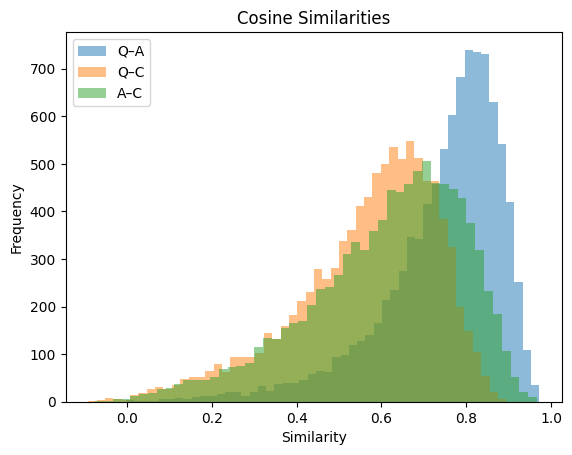

In [15]:
import matplotlib.pyplot as plt

plt.hist(q_a_sim, bins=50, alpha=0.5, label="Q–A")
plt.hist(q_c_sim, bins=50, alpha=0.5, label="Q–C")
plt.hist(a_c_sim, bins=50, alpha=0.5, label="A–C")
plt.legend()
plt.title("Cosine Similarities")
plt.xlabel("Similarity")
plt.ylabel("Frequency")
plt.show()


In [16]:
from sklearn.manifold import TSNE

# Run t-SNE on the question embeddings
tsne = TSNE(n_components=2, perplexity=30, learning_rate=200, random_state=42)
q_tsne = tsne.fit_transform(q_embeddings)


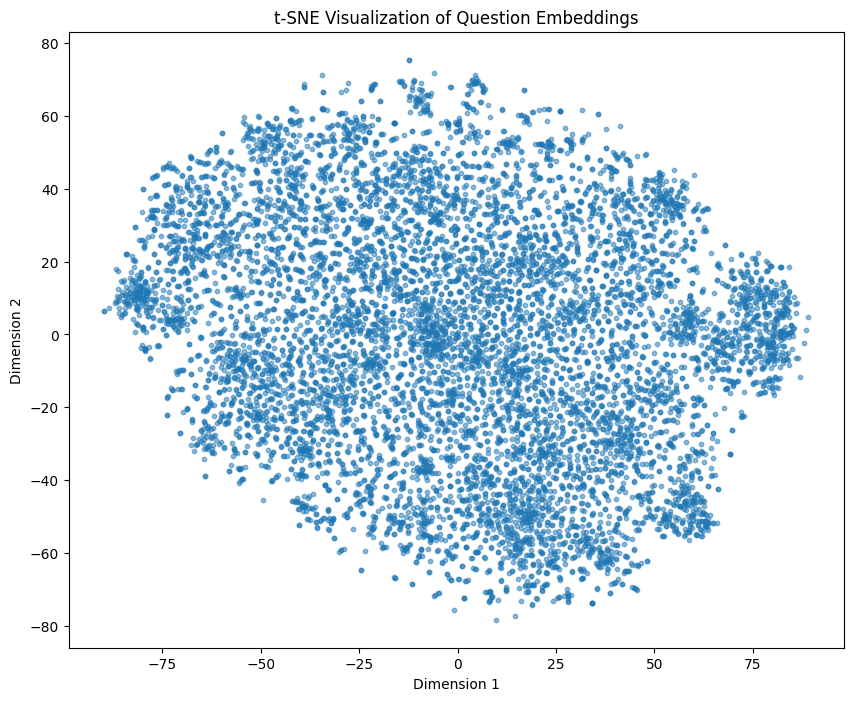

In [17]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
plt.scatter(q_tsne[:, 0], q_tsne[:, 1], alpha=0.5, s=10)
plt.title("t-SNE Visualization of Question Embeddings")
plt.xlabel("Dimension 1")
plt.ylabel("Dimension 2")
plt.show()


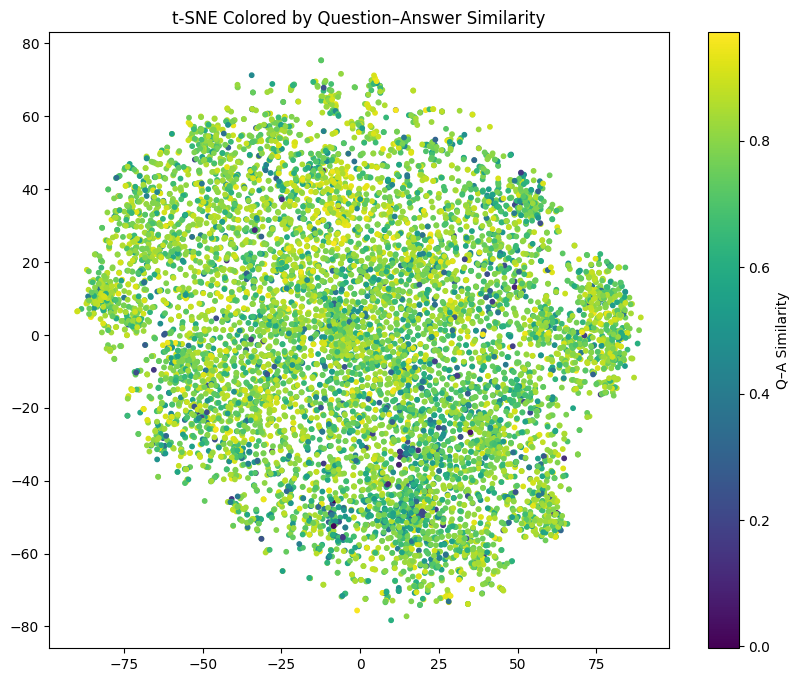

In [18]:
import numpy as np

subset_sim = q_a_sim[:len(q_tsne)]  # match dimensions if subset used

plt.figure(figsize=(10, 8))
plt.scatter(q_tsne[:, 0], q_tsne[:, 1], c=subset_sim, cmap="viridis", s=10)
plt.colorbar(label="Q–A Similarity")
plt.title("t-SNE Colored by Question–Answer Similarity")
plt.show()


In [19]:
import numpy as np

# Optional: use a subset if t-SNE is slow
N = 2000
q_subset = q_embeddings[:N]
a_subset = a_embeddings[:N]
c_subset = c_embeddings[:N]

# Stack all embeddings
all_embeddings = np.vstack([q_subset, a_subset, c_subset])

# Create labels: 0 = question, 1 = answer, 2 = context
labels = np.array([0]*N + [1]*N + [2]*N)


In [20]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, perplexity=30, learning_rate=200, random_state=42)
tsne_result = tsne.fit_transform(all_embeddings)


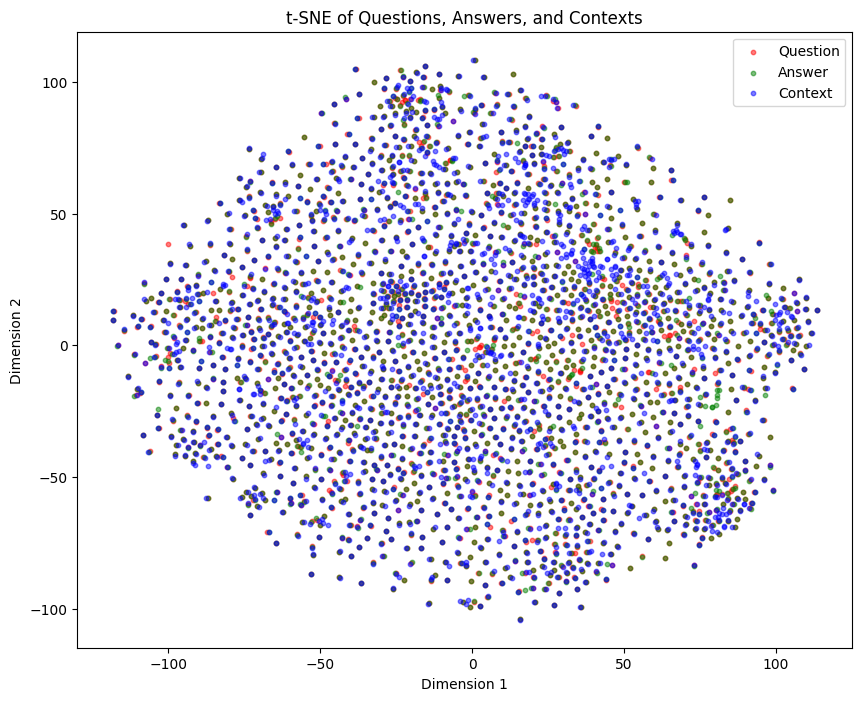

In [21]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))

# Create color map
colors = ['red', 'green', 'blue']
label_names = ['Question', 'Answer', 'Context']

for label_id in [0, 1, 2]:
    idx = labels == label_id
    plt.scatter(tsne_result[idx, 0], tsne_result[idx, 1],
                s=10, alpha=0.5, label=label_names[label_id], c=colors[label_id])

plt.legend()
plt.title("t-SNE of Questions, Answers, and Contexts")
plt.xlabel("Dimension 1")
plt.ylabel("Dimension 2")
plt.show()


In [22]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt


In [23]:
# Choose number of clusters (e.g., 5–10 is a good start)
num_clusters = 6

kmeans = KMeans(n_clusters=num_clusters, random_state=42)
q_labels = kmeans.fit_predict(q_embeddings)


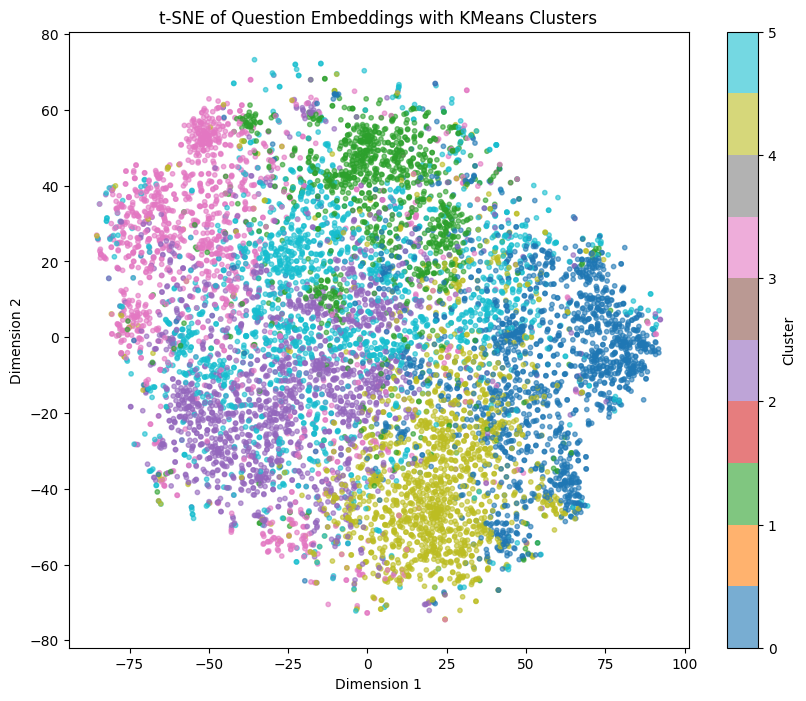

In [24]:
from sklearn.manifold import TSNE

# Reduce dimensionality of question embeddings
tsne = TSNE(n_components=2, perplexity=30, random_state=42)
q_tsne = tsne.fit_transform(q_embeddings)

# Plot with cluster colors
plt.figure(figsize=(10, 8))
plt.scatter(q_tsne[:, 0], q_tsne[:, 1], c=q_labels, cmap="tab10", s=10, alpha=0.6)
plt.title("t-SNE of Question Embeddings with KMeans Clusters")
plt.xlabel("Dimension 1")
plt.ylabel("Dimension 2")
plt.colorbar(label="Cluster")
plt.show()


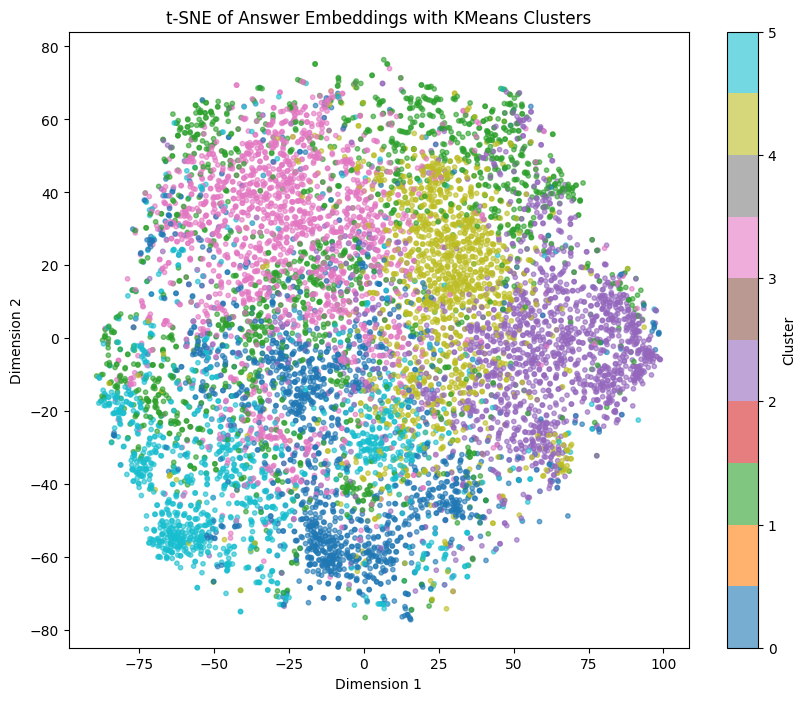

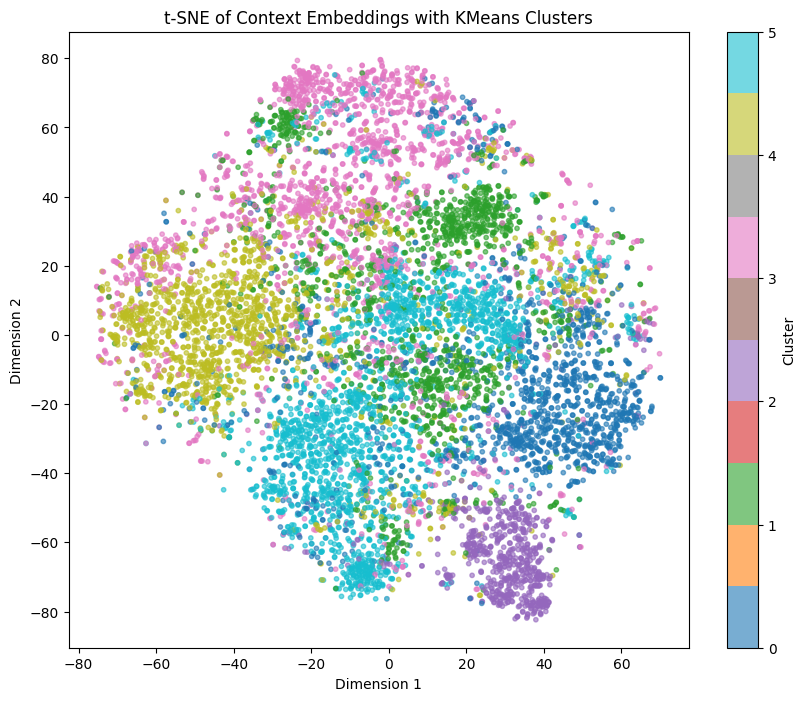

In [27]:
from sklearn.cluster import KMeans
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import numpy as np

# Number of clusters to use
num_clusters = 6

# --- Clustering ANSWERS ---
a_labels = KMeans(n_clusters=num_clusters, random_state=42).fit_predict(a_embeddings)
a_tsne = TSNE(n_components=2, perplexity=30, random_state=42).fit_transform(a_embeddings)

plt.figure(figsize=(10, 8))
plt.scatter(a_tsne[:, 0], a_tsne[:, 1], c=a_labels, cmap="tab10", s=10, alpha=0.6)
plt.title("t-SNE of Answer Embeddings with KMeans Clusters")
plt.xlabel("Dimension 1")
plt.ylabel("Dimension 2")
plt.colorbar(label="Cluster")
plt.show()


# --- Clustering CONTEXTS ---
c_labels = KMeans(n_clusters=num_clusters, random_state=42).fit_predict(c_embeddings)
c_tsne = TSNE(n_components=2, perplexity=30, random_state=42).fit_transform(c_embeddings)

plt.figure(figsize=(10, 8))
plt.scatter(c_tsne[:, 0], c_tsne[:, 1], c=c_labels, cmap="tab10", s=10, alpha=0.6)
plt.title("t-SNE of Context Embeddings with KMeans Clusters")
plt.xlabel("Dimension 1")
plt.ylabel("Dimension 2")
plt.colorbar(label="Cluster")
plt.show()


## Summary: Semantic Analysis Using Sentence Transformers

In this notebook, we analyzed the semantic structure of the RAG Dataset 12000 using the `sentence-transformers` model (`all-MiniLM-L6-v2`). The goal was to explore how semantically close questions, answers, and their supporting contexts are using dense embeddings.

### Steps Completed:
- Loaded and cleaned all entries in the dataset (questions, answers, contexts).
- Generated semantic embeddings using `sentence-transformers`.
- Calculated cosine similarity scores for:
  - Question–Answer
  - Question–Context
  - Answer–Context
- Applied **t-SNE** to visualize the 2D structure of the embeddings.
- Performed **KMeans clustering** to identify groups of semantically similar items across:
  - Questions
  - Answers
  - Contexts

### Key Observations:
- **Cosine Similarity**: Most question–answer pairs had higher similarity scores than question–context or answer–context, indicating that answers generally reflect the question well.
- **t-SNE Visualization**:
  - Semantic embeddings of questions, answers, and contexts form distinguishable clusters in 2D space.
  - Contexts tend to be more spread out, which is expected due to their longer and more diverse content.
- **Clustering with KMeans**:
  - For questions, the clusters revealed potential thematic groupings (e.g., health, government, environment).
  - Answers were more compact and easier to cluster, showing semantic uniformity.
  - Contexts were more diverse, but still showed localized structure.



In [29]:
!pip install nbconvert


In [30]:
!jupyter nbconvert --ClearMetadataPreprocessor.enabled=True --clear-output --to notebook \
  --output="semantic_analysis.ipynb" "semantic.ipynb"


[NbConvertApp] WARNING | pattern 'semantic.ipynb' matched no files
This application is used to convert notebook files (*.ipynb)
        to various other formats.


Options
The options below are convenience aliases to configurable class-options,
as listed in the "Equivalent to" description-line of the aliases.
To see all configurable class-options for some <cmd>, use:
    <cmd> --help-all

--debug
    set log level to logging.DEBUG (maximize logging output)
    Equivalent to: [--Application.log_level=10]
--show-config
    Show the application's configuration (human-readable format)
    Equivalent to: [--Application.show_config=True]
--show-config-json
    Show the application's configuration (json format)
    Equivalent to: [--Application.show_config_json=True]
--generate-config
    generate default config file
    Equivalent to: [--JupyterApp.generate_config=True]
-y
    Answer yes to any questions instead of prompting.
    Equivalent to: [--JupyterApp.answer_yes=True]
--execute
    Ex

In [31]:
from google.colab import files
files.download("semantic_clean.ipynb")


FileNotFoundError: Cannot find file: semantic_clean.ipynb